In [1]:
import random
import math
import matplotlib.pyplot as plt
from collections import Counter

def bernoulli_trial(p):
    return 1 if random.random() < p else 0

def binomial(n, p):
    return sum(bernoulli_trial(p) for _ in range(n))

In [2]:
def normal_cdf(x, mu, sigma):
    return (1 + math.erf((x - mu) / (math.sqrt(2) * sigma))) / 2

In [3]:
def make_hist(p, n, num_points):
    data = [binomial(n, p) for _ in range(num_points)]
    # Utiliser un diagramme en bâtons pour montrer les exemples de loi binomiale
    histogram = Counter(data)
    plt.bar([x - 0.4 for x in histogram.keys()], [v / num_points for v in histogram.values()], 0.8, color='0.75')
    mu = p * n
    sigma = math.sqrt(n * p * (1 - p))
    # Utiliser une courbe pour montrer l'approximation de la loi normale
    xs = range(min(data), max(data) + 1)
    ys = [normal_cdf(i + 0.5, mu, sigma) - normal_cdf(i - 0.5, mu, sigma) for i in xs]
    plt.plot(xs, ys)
    plt.title("Distribution binomiale comparée à l'approximation normale")
    plt.show()

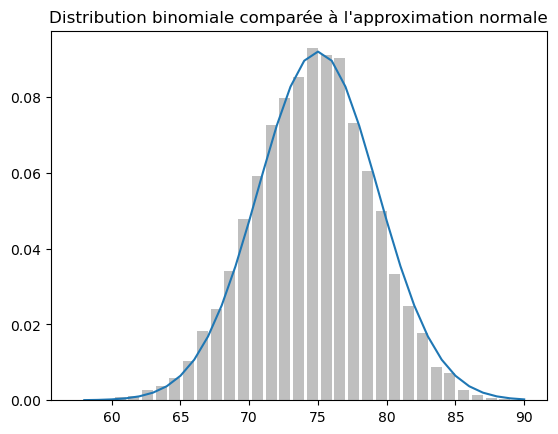

In [4]:
make_hist(0.75, 100, 10000)